# Load Library & Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
style.use("fivethirtyeight")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission_sample.csv')

# correlation ÌååÏïÖÌïòÍ∏∞

<AxesSubplot:>

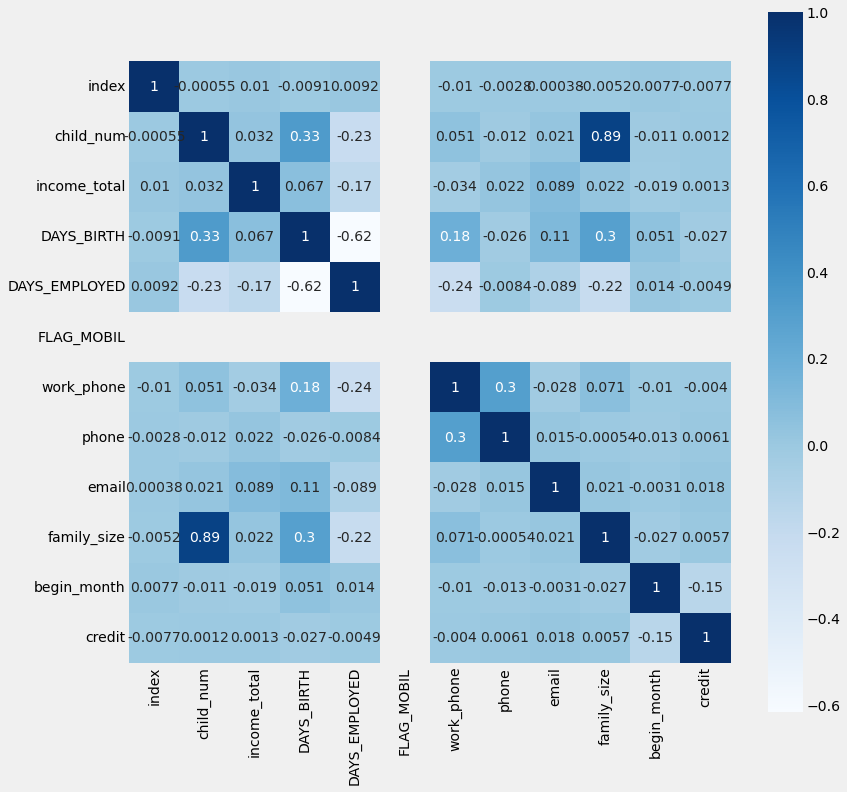

In [4]:
# Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(),square = True, annot = True, cmap='Blues')

In [5]:
corr_df = train.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))

In [6]:
s = corr_df.unstack()
df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

+ child_numÍ≥º family_sizeÎäî 0.89Î°ú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Îß§Ïö∞ ÎöúÎ†∑Ïù¥ ÎÇòÌÉÄÎÇ®.

# credit Î∂ÑÏÑù

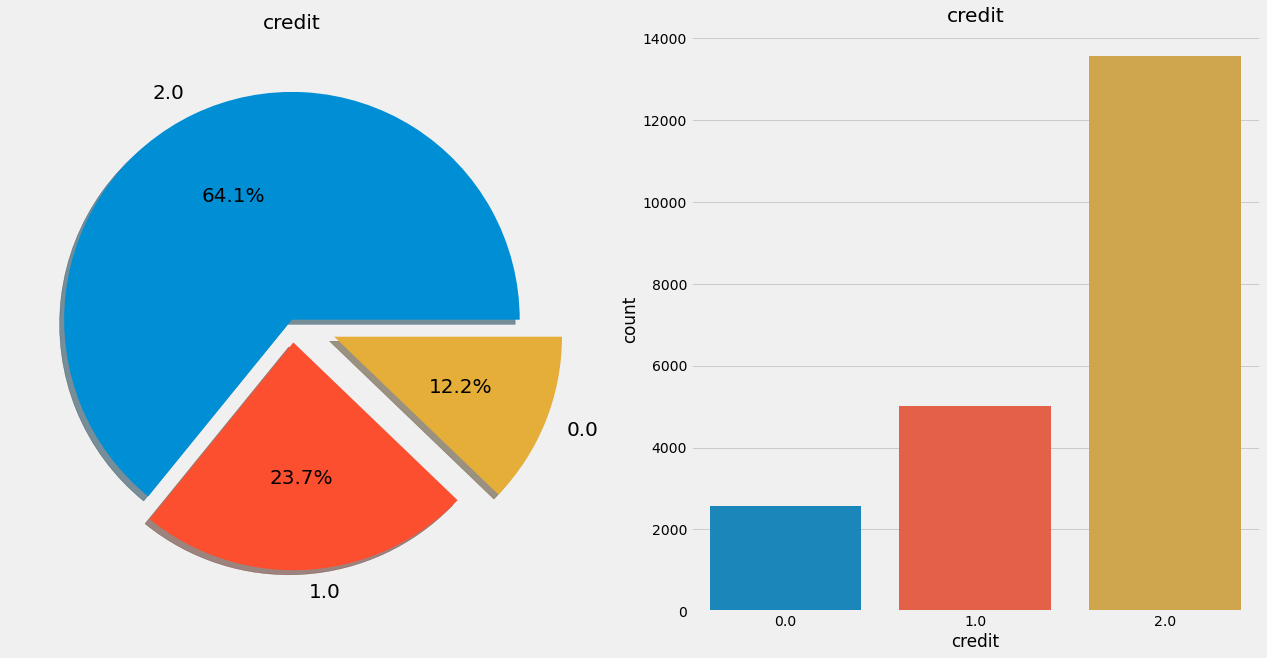

In [7]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

train['credit'].value_counts().plot.pie(explode=[0, 0.1, 0.2],
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True,
                                         fontsize=20)
ax[0].set_title('credit')
ax[0].set_ylabel('')

sns.countplot('credit', data=train, ax=ax[1])
ax[1].set_title('credit')
plt.show()

- Ïã†Ïö©ÎèÑÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú 12%, 24%, 64%Ïùò ÎπÑÏú®

# Ïà´ÏûêÌòï Î≥ÄÏàò Ï†ÑÏ≤òÎ¶¨

## ÌååÏÉùÎ≥ÄÏàò(ability, before_EMPLOYED)

In [8]:
#ability: ÏÜåÎìù/(ÏÇ¥ÏïÑÏò® ÏùºÏàò+ Í∑ºÎ¨¥ÏùºÏàò)
train['ability'] = train['income_total'] / (train['DAYS_BIRTH'] + train['DAYS_EMPLOYED'])
test['ability'] = test['income_total'] / (test['DAYS_BIRTH'] + test['DAYS_EMPLOYED'])

# before_EMPLOYED: Í≥†Ïö©ÎêòÍ∏∞ Ï†ÑÍπåÏßÄÏùò ÏùºÏàò
train['before_EMPLOYED'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']
test['before_EMPLOYED'] = test['DAYS_BIRTH'] - test['DAYS_EMPLOYED']

## DAYS_EMPLOYED

+ DAYS_EMPLOYED(ÏóÖÎ¨¥ÏãúÏûëÏùº)ÏóêÏÑú ÏñëÏàò Í∞íÏùÄ Í≥†Ïö©ÎêòÏßÄ ÏïäÏùÄ ÏÉÅÌÉúÎ•º ÏùòÎØ∏Ìï®
+ Îî∞ÎùºÏÑú Î™®Îì† ÏñëÏàòÍ∞íÏùÑ 0ÏúºÎ°ú Î∞îÍøîÏïº Ìï®.

In [9]:
# dayÎ•º yearÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÎäî Ìï®Ïàò
def days_to_year(x):
    return x/365

In [10]:
# 0 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ 0ÏúºÎ°ú Î™®Îëê Î≥ÄÌôò
train.loc[train['DAYS_EMPLOYED'] >= 0,'DAYS_EMPLOYED']=0
test.loc[test['DAYS_EMPLOYED'] >= 0,'DAYS_EMPLOYED']=0

# dayÎ•º yearÎ°ú Î≥ÄÌôò, ÏùåÏàòÍπÇÏúºÎ°ú ÎÇòÏò§ÎØÄÎ°ú (-1) Í≥±Ìï¥ÏÑú ÏñëÏàòÎ°ú Î∞îÍøîÏ§å.
train['DAYS_EMPLOYED'] = days_to_year(train['DAYS_EMPLOYED'])*(-1)
test['DAYS_EMPLOYED'] = days_to_year(test['DAYS_EMPLOYED'])*(-1)

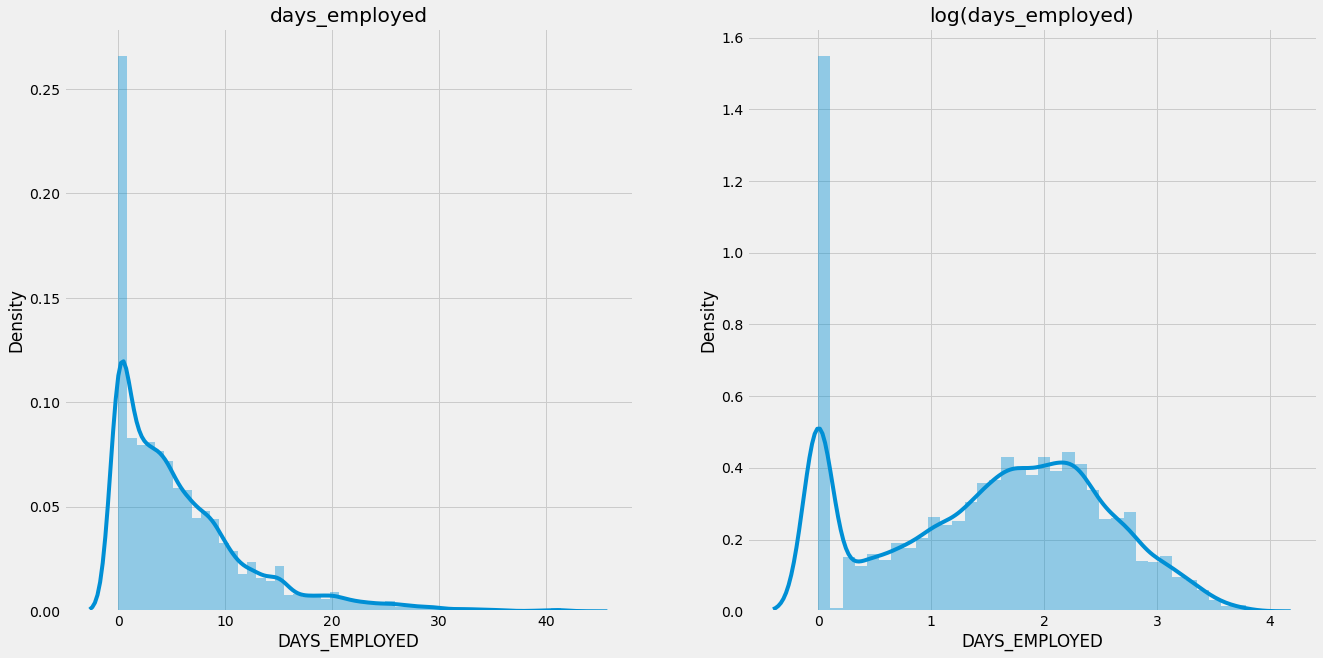

In [11]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(train['DAYS_EMPLOYED'],ax=ax[0])
ax[0].set_title('days_employed')

sns.distplot(np.log1p(train['DAYS_EMPLOYED']),ax=ax[1])
ax[1].set_title('log(days_employed)')
plt.show()

In [12]:
# Î°úÍ∑∏ Î≥ÄÌôò
train['DAYS_EMPLOYED_log'] = train['DAYS_EMPLOYED'].apply(np.log1p)
test['DAYS_EMPLOYED_log'] = test['DAYS_EMPLOYED'].apply(np.log1p)

## income_total

+ income_total(Ïó∞Í∞ÑÏÜåÎìù)
+ ÎßåÏõê Îã®ÏúÑÎ°ú ÎßåÎì§Ïûê!

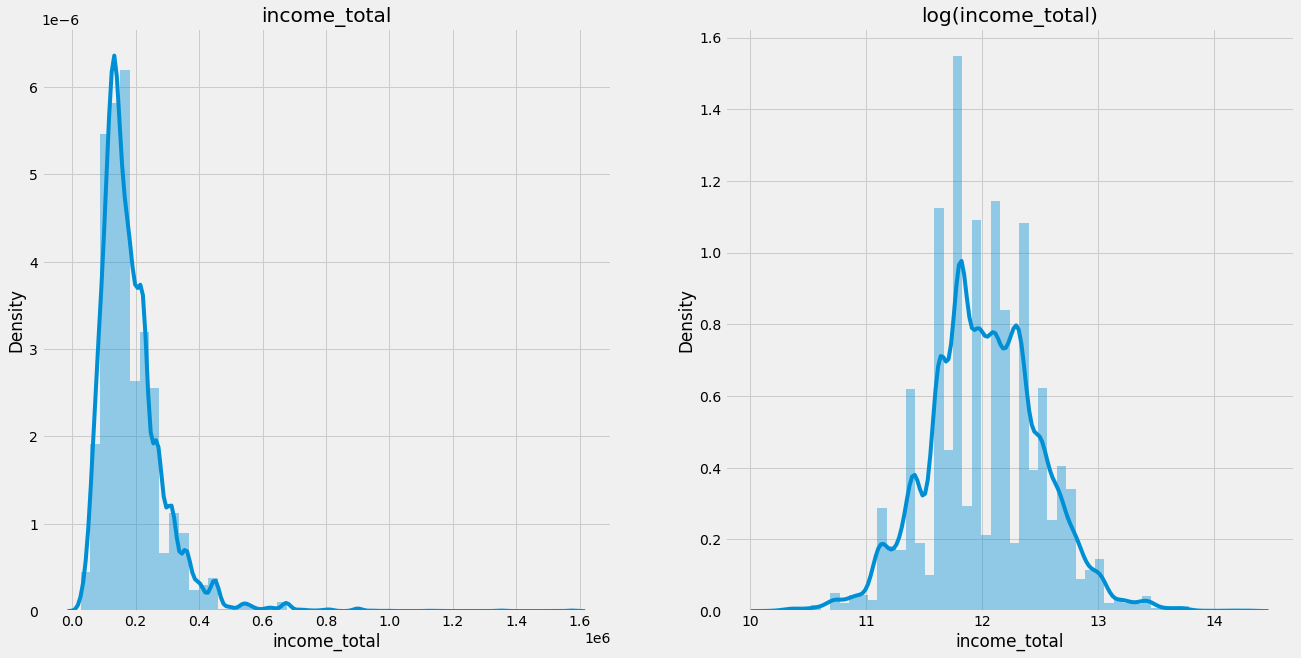

In [13]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(train['income_total'],ax=ax[0])
ax[0].set_title('income_total')

sns.distplot(np.log1p(train['income_total']),ax=ax[1])
ax[1].set_title('log(income_total)')
plt.show()

In [14]:
# Ïà´ÏûêÍ∞Ä ÎÑàÎ¨¥ Ïª§ ÎßåÎã®ÏúÑÎ°ú Î∞îÍøîÏ§å.
train['income_total'] = train['income_total']/10000
test['income_total'] = test['income_total']/10000

# Ìé∏Ï∞® Ï†úÍ≥± Î≥ÄÏàò ÏÉùÏÑ±
train['income_total_dev'] = (train['income_total'] - train['income_total'].mean())**2
test['income_total_dev'] = (test['income_total'] - test['income_total'].mean())**2

# Î°úÍ∑∏ Î≥ÄÌôò
train['income_total_log'] = train['income_total'].apply(np.log1p)
test['income_total_log'] = test['income_total'].apply(np.log1p)

## DAYS_BIRTH

+ DAYS_BIRTH(Ï∂úÏÉùÏùº): Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÎãπÏãú (0)Î∂ÄÌÑ∞ Ïó≠ÏúºÎ°ú ÏÖà, Ï¶â, -1ÏùÄ Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùº ÌïòÎ£® Ï†ÑÏóê ÌÉúÏñ¥ÎÇ¨ÏùåÏùÑ ÏùòÎØ∏

In [15]:
# dayÎ•º yearÎ°ú Î≥ÄÌôò, ÏùåÏàòÍ∞íÏúºÎ°ú ÎÇòÌÉÄÎÇòÎØÄÎ°ú ÏñëÏàòÎ°ú Î≥ÄÌôò
train['DAYS_BIRTH'] = days_to_year(train['DAYS_BIRTH'])*(-1)
test['DAYS_BIRTH'] = days_to_year(test['DAYS_BIRTH'])*(-1)

In [16]:
min(train['DAYS_BIRTH'].unique())

21.10958904109589

In [17]:
max(train['DAYS_BIRTH'].unique())

68.90958904109588

In [18]:
#nÍ∞úÏùò Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÍ∏∞
n=10 #ÌòÑÏû¨ 10Í∞úÎ°ú ÏÑ§Ï†ï
name=[int(i) for i in range(n)]
train['DAYS_BIRTH']=pd.cut(train['DAYS_BIRTH'],n,labels=name)
test['DAYS_BIRTH']=pd.cut(test['DAYS_BIRTH'],n,labels=name)

In [19]:
train['DAYS_BIRTH']=pd.to_numeric(train['DAYS_BIRTH'])
test['DAYS_BIRTH']=pd.to_numeric(test['DAYS_BIRTH'])

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Density'>

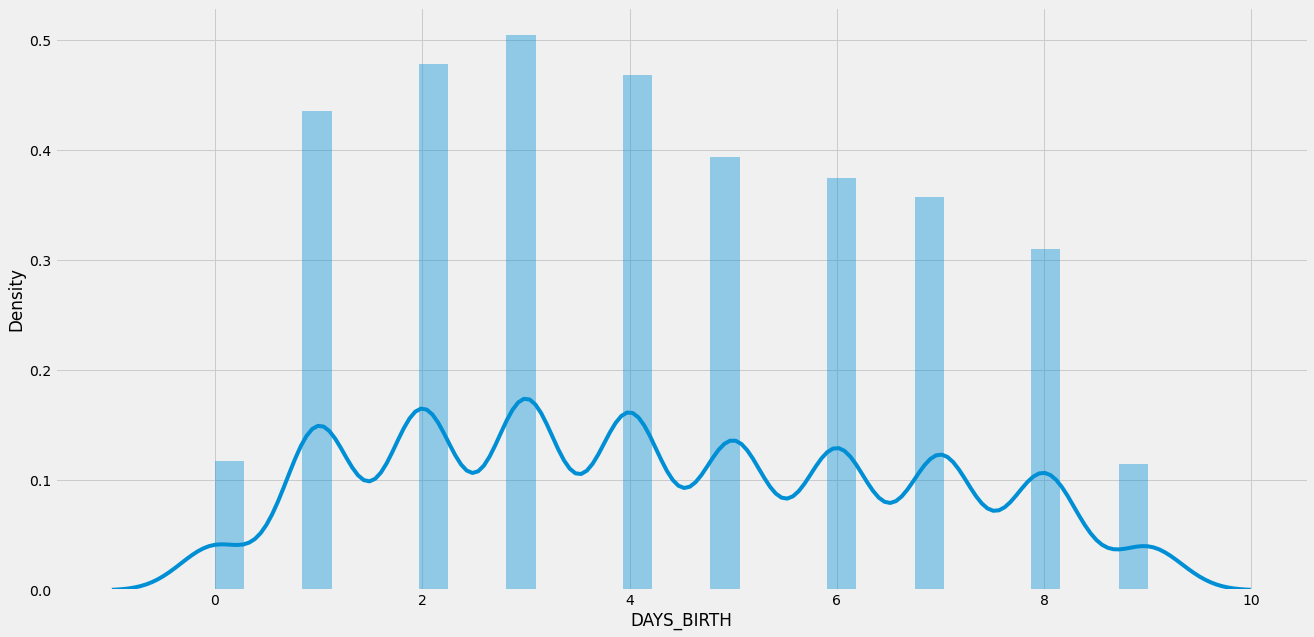

In [20]:
f, ax = plt.subplots(figsize=(20, 10))
sns.distplot(train['DAYS_BIRTH'])

## begin_month Ï†ÑÏ≤òÎ¶¨

+ begin_month(Ïã†Ïö©Ïπ¥Îìú Î∞úÍ∏â Ïõî): Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÎãπÏãú (0)Î∂ÄÌÑ∞ Ïó≠ÏúºÎ°ú ÏÖà, Ï¶â, -1ÏùÄ Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùº Ìïú Îã¨ Ï†ÑÏóê Ïã†Ïö©Ïπ¥ÎìúÎ•º Î∞úÍ∏âÌï®ÏùÑ ÏùòÎØ∏

In [21]:
# ÏùåÏàòÍ∞íÏúºÎ°ú ÎÇòÌÉÄÎÇòÎØÄÎ°ú ÏñëÏàòÍ∞íÏúºÎ°ú Î∞îÍøà
train['begin_month'] = train['begin_month']*(-1)
test['begin_month'] = test['begin_month']*(-1)

<AxesSubplot:xlabel='begin_month', ylabel='Density'>

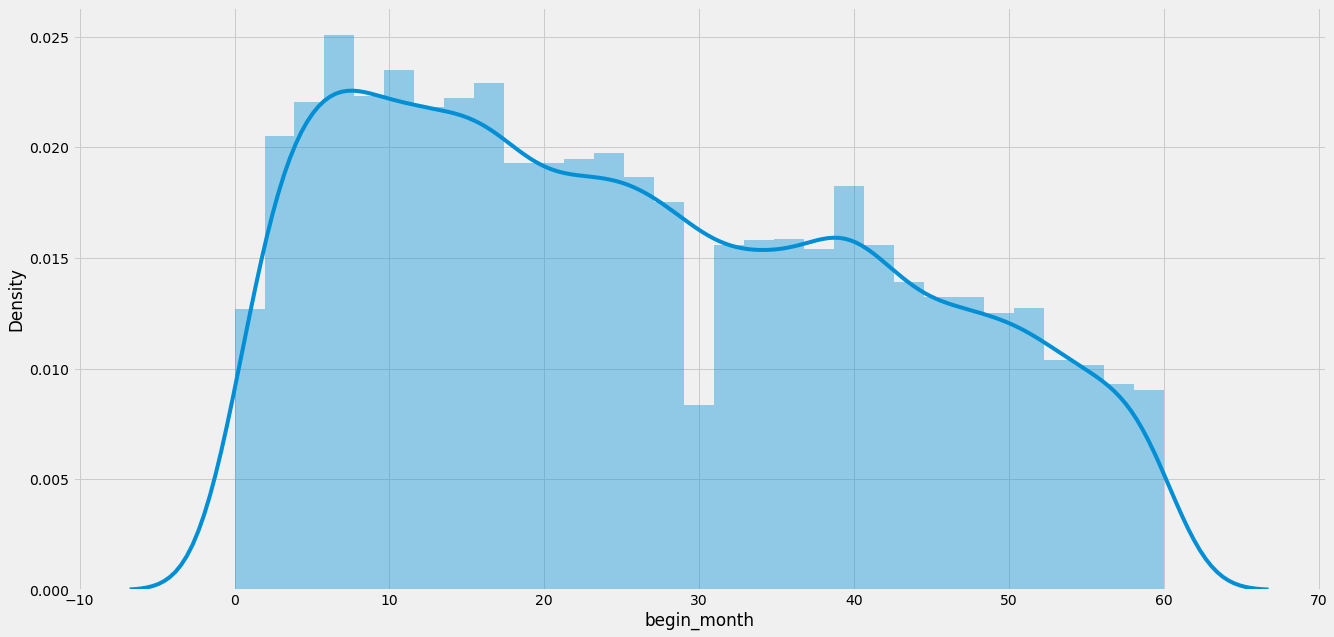

In [22]:
f, ax = plt.subplots(figsize=(20, 10))
sns.distplot(train['begin_month'])

## occyp_type Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨

+ occyp_type(ÏßÅÏóÖÏú†Ìòï)

In [23]:
train.isnull().sum()

index                   0
gender                  0
car                     0
reality                 0
child_num               0
income_total            0
income_type             0
edu_type                0
family_type             0
house_type              0
DAYS_BIRTH              0
DAYS_EMPLOYED           0
FLAG_MOBIL              0
work_phone              0
phone                   0
email                   0
occyp_type           6549
family_size             0
begin_month             0
credit                  0
ability                 0
before_EMPLOYED         0
DAYS_EMPLOYED_log       0
income_total_dev        0
income_total_log        0
dtype: int64

+ occyp_typeÏùÄ Í≤∞Ï∏°Í∞íÏù¥ 6549Í∞ú

In [24]:
# occyp_typeÏóê ÏûàÎäî Í≤∞Ï∏°ÏπòÎ•º 'DoNotKnow'Í∞íÏúºÎ°ú ÎåÄÏ≤¥
train['occyp_type'] = train['occyp_type'].fillna('DoNotKnow')
test['occyp_type'] = test['occyp_type'].fillna('DoNotKnow')

In [25]:
count = 0
category = []
for i in train:
    if train[i].dtype == 'object':
        count += 1
        category.append(i)

In [26]:
for j, cat in enumerate(category):
    for k in train[cat].unique():
        print(f'{k} in {cat}')
        print(train.groupby(by=[cat,'credit'])['index'].count()[k]/train[cat].value_counts()[k])
        print('-'*30)
    print('='*40)

F in gender
credit
0.0    0.121212
1.0    0.237268
2.0    0.641520
Name: index, dtype: float64
------------------------------
M in gender
credit
0.0    0.123002
1.0    0.236016
2.0    0.640982
Name: index, dtype: float64
------------------------------
N in car
credit
0.0    0.120940
1.0    0.242337
2.0    0.636723
Name: index, dtype: float64
------------------------------
Y in car
credit
0.0    0.123223
1.0    0.227862
2.0    0.648915
Name: index, dtype: float64
------------------------------
Y in reality
credit
0.0    0.120736
1.0    0.243016
2.0    0.636249
Name: index, dtype: float64
------------------------------
N in reality
credit
0.0    0.124006
1.0    0.224165
2.0    0.651828
Name: index, dtype: float64
------------------------------
Pensioner in income_type
credit
0.0    0.119718
1.0    0.247324
2.0    0.632958
Name: index, dtype: float64
------------------------------
State servant in income_type
credit
0.0    0.124267
1.0    0.223916
2.0    0.651817
Name: index, dtype: float

In [27]:
# Í≤ΩÎ†•Ïù¥ ÏóÜÍ≥† occyp_type(ÏßÅÏóÖÏú†Ìòï)Ïù¥ DoNotKnowÏù∏ ÏÇ¨ÎûåÏùÄ No_Type_Of_WorkÎ°ú ÎåÄÏ≤¥
train.loc[(train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'] == 'DoNotKnow'), 'occyp_type'] = 'No_Type_Of_Work'
test.loc[(test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'] == 'DoNotKnow'), 'occyp_type'] = 'No_Type_Of_Work'

In [28]:
train['occyp_type'].value_counts()

Laborers                 3629
No_Type_Of_Work          3544
DoNotKnow                3005
Core staff               2121
Sales staff              2021
Managers                 1718
Drivers                  1247
High skill tech staff     828
Accountants               742
Medicine staff            684
Cooking staff             378
Security staff            329
Cleaning staff            320
Private service staff     184
Waiters/barmen staff      106
Low-skill Laborers         98
Secretaries                78
Realty agents              53
HR staff                   51
IT staff                   29
Name: occyp_type, dtype: int64

## family_size & child_num

+ family_size(Í∞ÄÏ°±Í∑úÎ™®)
+ child_num(ÏûêÎÖÄ Ïàò)

In [29]:
train['family_size'].value_counts()

2.0     11280
1.0      4123
3.0      3717
4.0      1781
5.0       221
6.0        30
7.0         7
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [30]:
train['child_num'].value_counts()

0     14699
1      4331
2      1853
3       237
4        31
5         8
14        3
7         2
19        1
Name: child_num, dtype: int64

### outlier Ï≤òÎ¶¨

In [31]:
# family_sizeÎäî ÏµúÎåÄ 6Ïù¥ ÎêòÎèÑÎ°ù Ï†ÑÏ≤òÎ¶¨
train.loc[train['family_size'] >= 6,'child_num'] = 6
test.loc[test['family_size'] >= 6,'child_num'] = 6

# chid_numÏùÄ ÏµúÎåÄ 4Í∞Ä ÎêòÎèÑÎ°ù Ï†ÑÏ≤òÎ¶¨
train.loc[train['child_num'] >= 4,'child_num'] = 4
test.loc[test['child_num'] >= 4,'child_num'] = 4

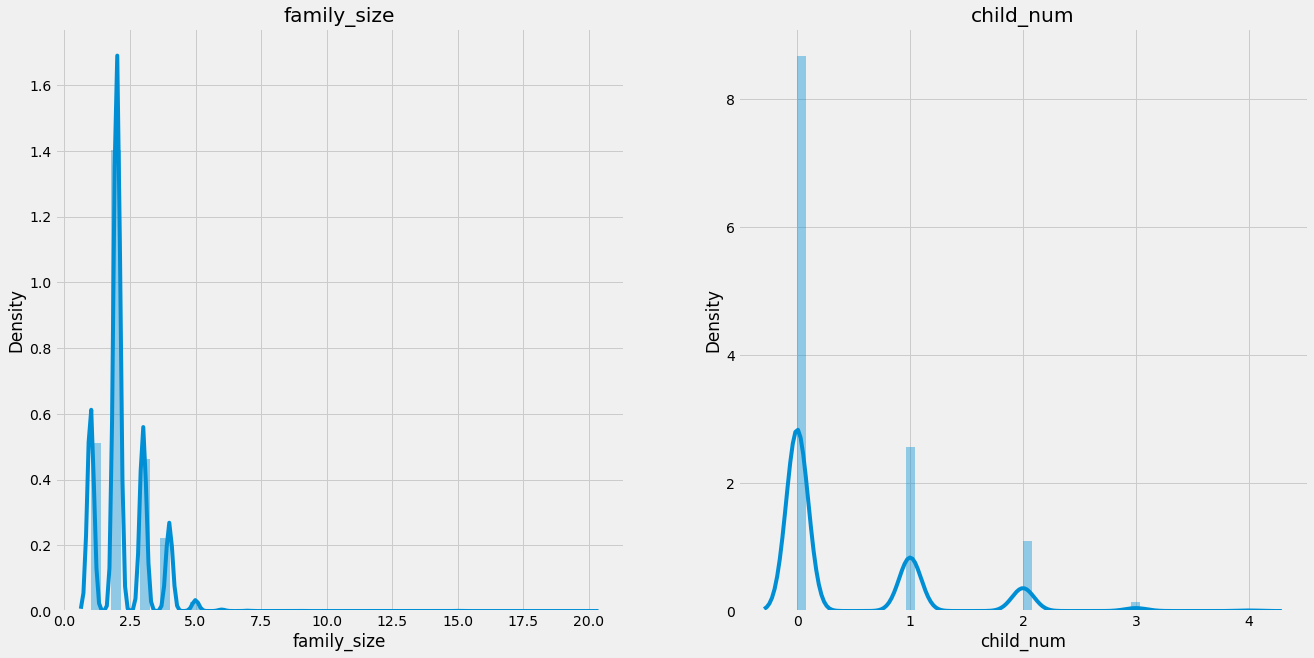

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(train['family_size'],ax=ax[0])
ax[0].set_title('family_size')

sns.distplot(train['child_num'],ax=ax[1])
ax[1].set_title('child_num')
plt.show()

## ÌååÏÉùÎ≥ÄÏàò(Í∞ÄÏ°±Ïàò+ÏûêÎÖÄÏàò)

In [33]:
# Í∞ÄÏ°±ÏàòÏôÄ ÏûêÎÖÄÏàò sum Î≥ÄÏàò Ï∂îÍ∞Ä
train['FAM_CHILD_SUM'] = train[['child_num', 'family_size']].sum(axis=1)
test['FAM_CHILD_SUM'] = test[['child_num', 'family_size']].sum(axis=1)

<AxesSubplot:xlabel='FAM_CHILD_SUM', ylabel='Density'>

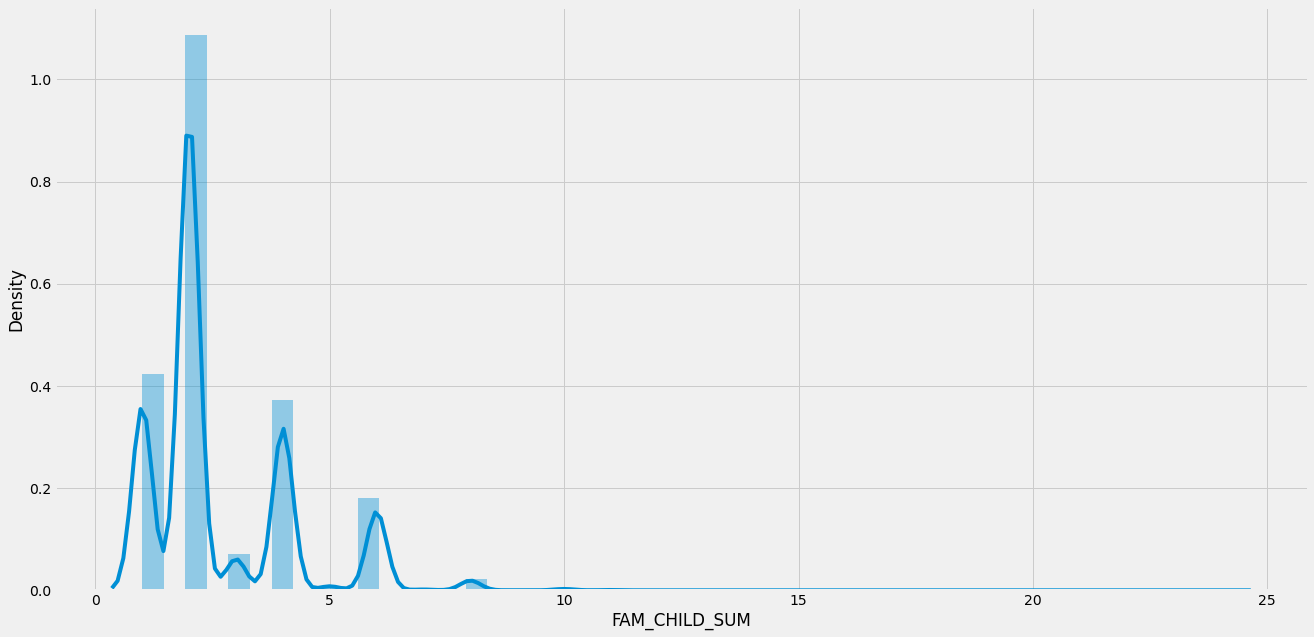

In [34]:
f, ax = plt.subplots(figsize=(20, 10))
sns.distplot(train['FAM_CHILD_SUM'])

## ÌååÏÉùÎ≥ÄÏàò(incomeÏùÑ Í∞ÄÏ°± ÏàòÎ°ú ÎÇòÎàà ÎπÑÏú®)

In [35]:
# incomeÏùÑ Í∞ÄÏ°± ÏàòÎ°ú ÎÇòÎàà ÎπÑÏú®
train['INCOME/FAMILY(RATIO)'] = train['income_total']/train['family_size']
test['INCOME/FAMILY(RATIO)'] = test['income_total']/test['family_size']

<AxesSubplot:xlabel='INCOME/FAMILY(RATIO)', ylabel='Density'>

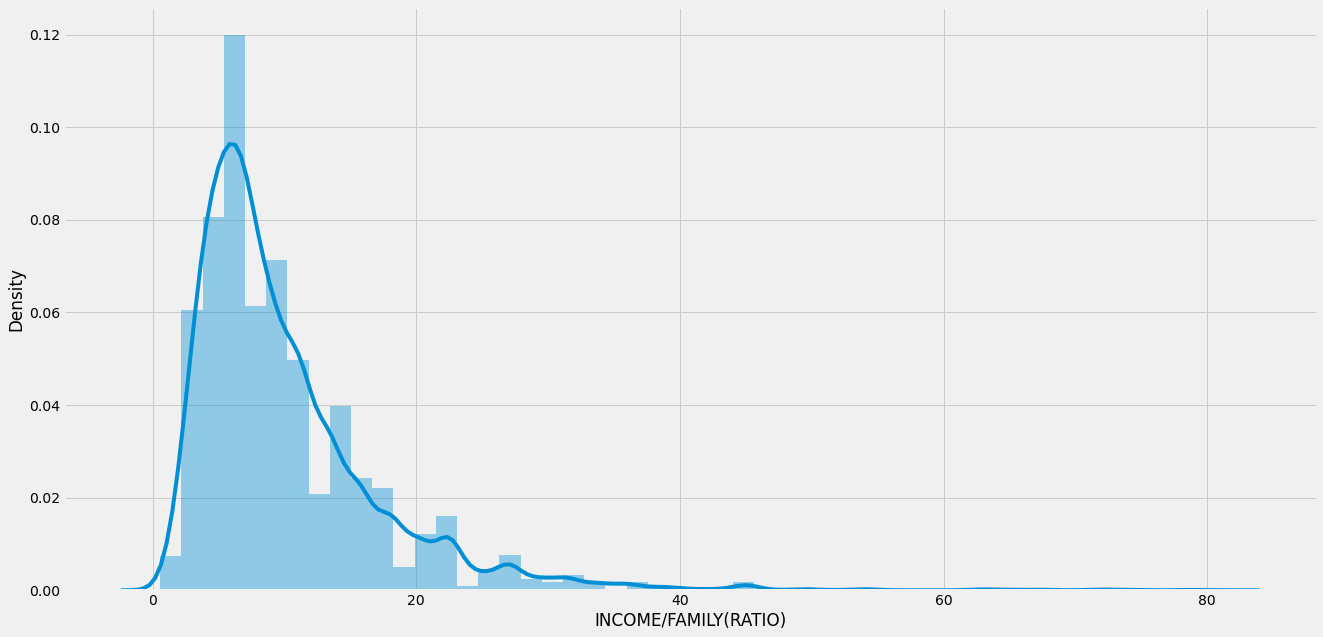

In [36]:
f, ax = plt.subplots(figsize=(20, 10))
sns.distplot(train['INCOME/FAMILY(RATIO)'])

# ÌïÑÏöîÏóÜÎäî Î≥ÄÏàò Ï†úÍ±∞ÌïòÍ∏∞

In [37]:
train = train.drop(['index','FLAG_MOBIL','income_total','DAYS_EMPLOYED','family_size','child_num'], axis=1)
test = test.drop(['index','FLAG_MOBIL','income_total','DAYS_EMPLOYED','family_size','child_num'], axis=1)

In [38]:
train_x = train.drop(['credit'],axis=1)
train_y = train['credit']
test_x=test

#  Label Encoding

In [39]:
categorical = train.select_dtypes(object).columns
categorical

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type'],
      dtype='object')

In [40]:
label = preprocessing.LabelEncoder()
train_processed = pd.DataFrame() 
test_processed = pd.DataFrame() 

for i in train.columns :
    if i in categorical :
        train_processed[i]=label.fit_transform(train[i])
        test_processed[i]=label.fit_transform(test[i])
    elif i == 'credit' :
        train_processed[i]=train[i]
    else :
        train_processed[i]=train[i]
        test_processed[i]=test[i]

# classifier ÏÑ§Ï†ï

In [41]:
train_processed_x = train_processed.drop(['credit'],axis=1)
train_processed_y = train_processed['credit']
test_processed_x = test_processed

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [43]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(),
}

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(train_processed_x, train_processed_y, test_size=0.2,random_state=49)

In [45]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_valid)
    print(key)
    print(accuracy_score(y_valid, y_pred))
    print()

LogisticRegression
0.6484762579730687

KNeighbors
0.6135128750295299

SVC
0.6484762579730687

DecisionTree
0.6111504842901015

RandomForest
0.6985589416489487

XGBoost
0.7065910701630049



+ XGBoostÍ∞Ä accuracyÍ∞Ä Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÏò¥
+ **XGBOOSTÎ°ú ÌïòÏûê!**

# parameter ÏÑ§Ï†ï

## wandbÏΩîÎìú(Colab ÏÇ¨Ïö©)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/·Ñã·Öµ·Ü´·Ñâ·Ö°·Ñã·Öµ·Ñè·Ö©·Ü´ 2/Îç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_train.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/·Ñã·Öµ·Ü´·Ñâ·Ö°·Ñã·Öµ·Ñè·Ö©·Ü´ 2/Îç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨Îç∞Ïù¥ÌÑ∞_test.csv', index_col=0)
submission = pd.read_csv('/content/drive/MyDrive/·Ñã·Öµ·Ü´·Ñâ·Ö°·Ñã·ÖµÏΩò 2/submission_sample.csv')

In [ ]:
X = train.drop(['familiy+child', 'credit'], axis=1)
Y = train['credit']

In [ ]:
!pip install wandb -qqq
import wandb
wandb.login()

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
      "name": "accuracy",
      "goal": "maximize"   
    },
    "parameters": {
        "objective": {
            "values": ['multi:softmax']
        },
        "n_estimator": {
            "values": [50, 75, 100, 200, 300, 500, 1000]
        },
        "max_depth": {
            "values": [16, 18, 20, 22, 24, 26]
        },
        "learning_rate": {
            "values": [0.03, 0.05, 0.07, 0.1]
        },
        "subsample": {
            "values": [1, 0.5, 0.3]
        },
        "gamma": {
            "values": [0, 1, 2, 3]
        },
        "min_child_weight":{
            "values": [1, 3, 5]
        },
        "colsample_bytree":{
            "values": [0.5, 0.75, 1]
        },
        "colsample_bylevel":{
            "values": [0.5, 0.75, 1]
        },
        "lambda":{
            "values": [0.5, 1, 1.5, 2]
        }

    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="XGBoost-sweeps")

In [ ]:
# XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
def train():
  config_defaults = {
    "booster": "gbtree",
    "max_depth": 3,
    "learning_rate": 0.1,
    "subsample": 1,
    "seed": 117,
    "test_size": 0.33,
  }

  wandb.init(config=config_defaults)  # defaults are over-ridden during the sweep
  config = wandb.config

  # load data and split into predictors and targets
  #dataset = loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
  #X, Y = dataset[:, :8], dataset[:, 8]

  # split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                      test_size=config.test_size,
                                                      random_state=config.seed)

  # fit model on train
  model = XGBClassifier(booster=config.booster, max_depth=config.max_depth,
                        learning_rate=config.learning_rate, subsample=config.subsample)
  model.fit(X_train, y_train)

  # make predictions on test
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print(f"Accuracy: {int(accuracy * 100.)}%")
  wandb.log({"accuracy": accuracy})

In [ ]:
wandb.agent(sweep_id, train, count=50)

In [ ]:
sweep_config = {
    "method": "random", # try grid or random
    "metric": {
      "name": "accuracy",
      "goal": "maximize"   
    },
    "parameters": {
        "learning_rate": {
            "values": [0.05, 0.07]
        },
        "subsample": {
            "values": [0.7, 0.5, 0.3, 0.2]
        },
        "gamma": {
            "values": [0, 0.5, 1, 2]
        },
        "colsample_bytree":{
            "values": [0.5, 0.75, 1]
        },
        "lambda":{
            "values": [0.5, 1, 1.5, 2]
        },
        "sclae_pos_weight":{
            "values": [0.15, 0.3, 0.5, 0.7]
        }

    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="XGBoost-sweeps")

In [ ]:
# XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
def train():
  config_defaults = {
    "n_estimator": 200,
    "objective": 'multi:softmax',
    "booster": "gbtree",
    "max_depth": 16,
    "learning_rate": 0.1,
    "subsample": 1,
    "seed": 117,
    "test_size": 0.33,
  }

  wandb.init(config=config_defaults)  # defaults are over-ridden during the sweep
  config = wandb.config

  # load data and split into predictors and targets
  #dataset = loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
  #X, Y = dataset[:, :8], dataset[:, 8]

  # split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                      test_size=config.test_size,
                                                      random_state=config.seed)

  # fit model on train
  model = XGBClassifier(booster=config.booster, max_depth=config.max_depth,
                        learning_rate=config.learning_rate, subsample=config.subsample)
  model.fit(X_train, y_train)

  # make predictions on test
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]

  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  print(f"Accuracy: {int(accuracy * 100.)}%")
  wandb.log({"accuracy": accuracy})

In [ ]:
wandb.agent(sweep_id, train, count=50)

## wandb Í≤∞Í≥ºÍ∞í

+ hyperparameter Ïó¨Îü¨ Î≤à Ïã§ÌóòÌïú Í≤É Ï§ë ÌïòÎÇòÏùò ÏòàÏãú
+ accuracyÍ∞Ä Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÏò® parameter Ï°∞Ìï©Îì§ Ï§ë ÌïòÎÇò ÏÑ†ÌÉù!

![nn](ÏÇ¨ÏßÑ1.png)

![nn](ÏÇ¨ÏßÑ2.png)

In [46]:
xgb1 = XGBClassifier(
        booster='gbtree',
        learning_rate =0.05,
        n_estimators=1000,
        max_depth=6,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'multi:softmax',
        seed=5,
    )
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_valid)
accuracy=accuracy_score(y_valid, y_pred)
accuracy

0.7139144814552327

+ valid setÍ≥º ÎπÑÍµêÌñàÏùÑ ÎïåÏùò accuracyÍ∞íÏùÄ 0.714Í∞Ä ÎÇòÏò¥

In [47]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Ìïú Ï†ÑÏ≤¥ trainÍ∞íÏùÑ Ïù¥Ïö©Ìï¥ creditÍ∞í ÏòàÏ∏°
xgb1.fit(train_processed_x, train_processed_y)
y_pred = xgb1.predict(test_processed_x)

# Make Submission File

In [48]:
submission.loc[:,1:] = y_pred
submission

index  credit
0     24516       2
1     22181       2
2     19366       1
3     19847       2
4      1617       2
...     ...     ...
5287   4013       2
5288  19775       2
5289   6451       2
5290  17778       2
5291  19206       0

[5292 rows x 2 columns]

In [49]:
submission.to_csv('submission_6Ï°∞_Ï∞êÏ∞êÏ∞êÏ∞êÏµúÏ¢Ö.csv')

# Í∞êÏÇ¨Ìï©ÎãàÎã§üòä‚ù§Ô∏è‚Äç